In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
from scipy.fftpack import fft, fftfreq

import import_ipynb
from FTransformaciones_tiempo_frecuencia import Espectro, señal #periodicas
from FReconstrucciondeseñalesapartirdemuestras import h
from FTransformaciones_tf_de_una_señal_no_periodica import EspecCont #no periodicas

importing Jupyter notebook from FTransformaciones_tiempo_frecuencia.ipynb
importing Jupyter notebook from FReconstrucciondeseñalesapartirdemuestras.ipynb
importing Jupyter notebook from FTransformaciones_tf_de_una_señal_no_periodica.ipynb


- - -

    1. Determina los coeficientes de Fourier de la señal 𝑥1 (𝑛). En la figura 1 se muestra un ciclo de 𝑥1. Reconstruye 𝑥1(𝑛) a partir de los coeficientes antes determinados empleando la ecuación de síntesis. Representa 𝑥1(𝑛) y su espectro de amplitud y fase.

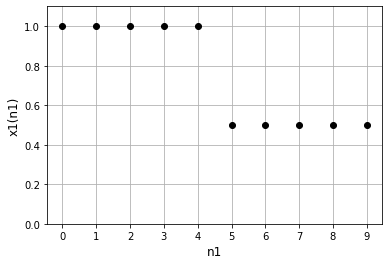

In [10]:
n1 = np.arange (0,10,dtype=float) #vector de muestras
x1 = np.piecewise (n1, [(n1 > 4)] , [lambda n1: 0.5, lambda n1: 1])


plt.plot(n1,x1,'ko')
plt.grid (True)
plt.xticks(np.arange(0,10,1))
plt.ylim (0,1.1)
plt.xlabel('n1',fontsize=12)
plt.ylabel('x1(n1)',fontsize=12)
plt.show()

### Ahora reconstruyo la señal original a partir de los coeficientes de Fourier (ecuación de síntesis) PERO USANDO EL ESPECTRO

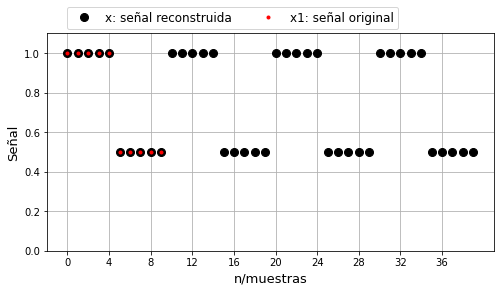

In [11]:
N1 = 10
nx1 = np.arange(40) #Multiplo entero del N, 10 puntos por ciclo 
x_1 = np.zeros(len(nx1),dtype=complex)
s1 = 0

c1 = Espectro(x1)
p1 = np.arange(N1)

for i in np.arange(N1): #Para hacer la sumatoria
    s1 = s1 + c1[i]*np.exp(2j*np.pi*i*nx1/N1)
x_1 = s1


plt.figure(figsize=(8,4))
plt.plot(nx1,abs(x_1),'ok',ms=8)
plt.plot(n1,x1,'ro',ms=3)
plt.xlabel('n/muestras', fontsize=13)
plt.ylabel('Señal', fontsize=13)
plt.legend(('x: señal reconstruida','x1: señal original'),prop={'size':12},bbox_to_anchor=(0.8,1.15),ncol=2)
plt.xticks(np.arange(0,37,4))
plt.ylim (0,1.1)
plt.grid(True)
plt.show()

En rojo está la señal original y en negro está la señal reconstruida.

- - -

### Para reconstruir x1 (n) a partir de Ck (sacando manualmente cuánto vale cada Ck):

In [12]:
# Para representar la señal x(n) en términos de c(k) uso la Ecuación de síntesis. En el ejemplo represento 3 ciclos de la señal (3N1) y c1 son los coeficientes de la serie de Fourier definidos como:

k1 = np.arange(0,10,dtype=complex)

c1 = np.piecewise(k1,[k1==0],

        [lambda k1: 0.75, lambda k1: np.exp(-7j*k1*np.pi/5)/20*(1+2*np.cos(k1*np.pi))*(1+2*np.cos(k1*np.pi/5)+2*np.cos(2*k1*np.pi/5))])



n = np.arange(3*N1)

xrec1 = np.zeros(len(n),dtype=complex)

s2 = 0

for i in np.arange(0,N1):

    s2 = s2 + c1[i] * np.exp(1j*2*np.pi*i*n/N1)

xrec1 = s2

/Users/paulaaguirrecarol/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<function matplotlib.pyplot.show(close=None, block=None)>

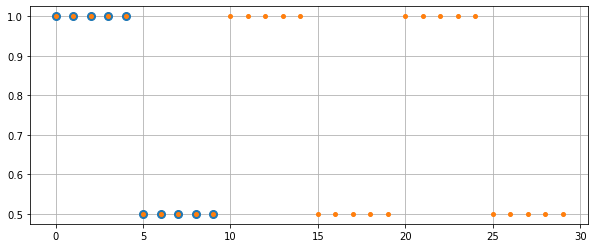

In [13]:
plt.figure (figsize=(10,4))
plt.plot (n1,x1,"o",ms=8)
plt.plot (n,xrec1,"o",ms=4)
plt.grid (True)
plt.show

- - -

### Una vez obtenidos los coeficientes aplicando la ecuación de síntesis:

### PARA RECONSTRUIR EL ESPECTRO

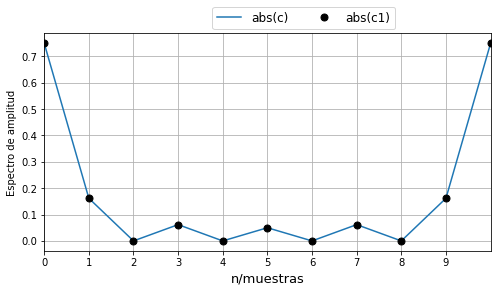

In [15]:
c1 = Espectro(x1)
pa1 = np.arange (N1)
N1, Fs = 800, 100
k1 = np.arange(N1)
c1 = np.ndarray(N1,dtype=complex) # defino la longitud del vector c
s1 = k1
for q in k1:
    if q==0:
        c1[q]=3/4
    else:
        c1[q]=np.exp(-1j*7*np.pi*q/5)/20*(1+2*np.cos(q*np.pi))*(1+2*np.cos(q*np.pi/5)+2*np.cos(np.pi*2*q/5))
        # reemplazo k por s en la ecuación


plt.figure(figsize=(8,4))
plt.plot(s1, abs(c1))
plt.plot(pa1,abs(c1),'ko',ms=7)
plt.xlabel('n/muestras', fontsize=13)
plt.xlim(0,10)
plt.ylabel('Espectro de amplitud')
plt.legend(('abs(c)','abs(c1)'),prop={'size':12},bbox_to_anchor=(0.8,1.15),ncol=2)
plt.xticks (n1)
plt.grid(True)
plt.show()

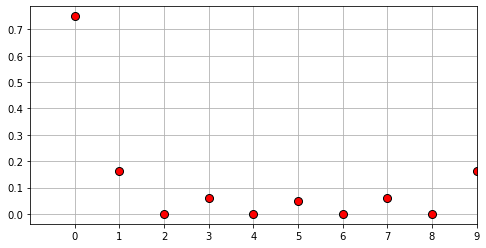

In [16]:
N1 , Fs1 = 10 , 1
X1 = fft (x1)/N1
frq1 = fftfreq (N1, 1/Fs1)
p1 = np.arange (len(X1))

plt.figure(figsize=(8,4))
plt.plot (figsize = (10,4))
plt.plot (k1,abs (c1),"ko",ms=8)
plt.plot (p1,abs (X1),"ro",ms=6)
plt.xlim (-1,9)
plt.xticks (n1)
plt.grid (True)
plt.show()

- - -

In [17]:
#FILTRAMOS EL ESPECTRO, para que todos los puntos sean muy pequeños, los filtramos
for i in pa1:
    if (abs(c1.real[i])<0.001):
        c1.real[i]=0
    if (abs(c1.imag[i])<0.001):
        c1.imag[i]=0

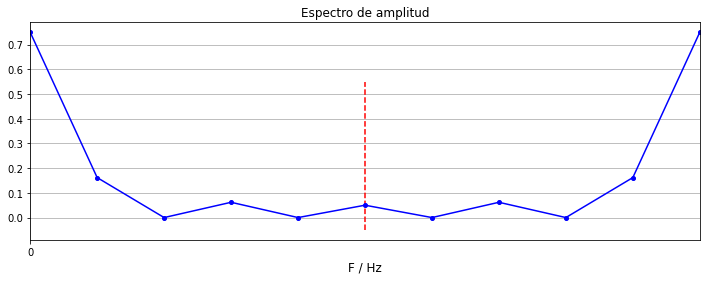

In [18]:
plt.figure(figsize=(12,4))

plt.plot(pa1*(Fs1/N1),abs(c1), '.-',color='b',ms=8)

plt.vlines(Fs1/2,-0.05,0.55, linestyles='dashed',color='r')
plt.xlim (0,1)
plt.xticks(np.arange(0,1,1))
plt.xlabel('F / Hz', fontsize=12)
plt.title('Espectro de amplitud')
plt.grid(True)
plt.show()

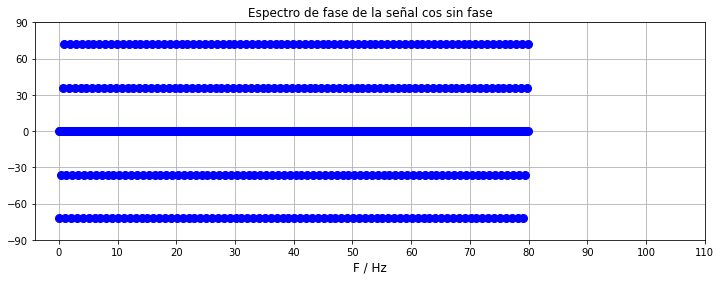

In [19]:
#ESPECTRO DE LA FASE

plt.figure(figsize=(12,4))
plt.plot(pa1*(Fs1/N1),np.angle(c1)*180/np.pi, 'o',color='b',ms=8)

plt.vlines(Fs1/2,-0.05,0.55, linestyles='dashed',color='r')

plt.xticks(np.arange(0,120,10))
plt.yticks(np.arange(-90,120,30))

plt.xlabel('F / Hz', fontsize=12)
plt.title('Espectro de fase de la señal cos sin fase')
plt.grid(True)
plt.show()

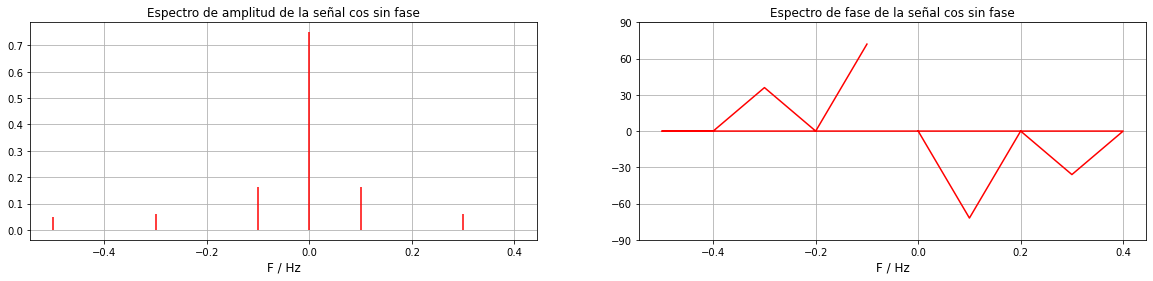

In [20]:
X1 = fft(x1)/N1 #Calcula el espectro
#N1 cantidad de puntos de muestreo
frq1 = fftfreq(N1,1/Fs1) #Calcula la frecuencia
#Número de puntos y el período de muestreo
n1 = np.arange(len(X1))
#Contador



#FILTRADO

for i in n1:
    if (abs(X1.real[i])<0.001):
        X1.real[i]=0
    if (abs(X1.imag[i])<0.001):
        X1.imag[i]=0



plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
plt.vlines(frq1,0,abs(X1),color='r') #espectro de línea
plt.xlabel('F / Hz', fontsize=12)
plt.title('Espectro de amplitud de la señal cos sin fase')
plt.grid(True)


plt.subplot(1,2,2)
plt.plot(frq1,np.angle(X1)*180/np.pi,color='r')
plt.yticks(np.arange(-90,120,30))
plt.xlabel('F / Hz', fontsize=12)
plt.title('Espectro de fase de la señal cos sin fase')
plt.grid(True)
plt.show()

- - -

    2. Ídem al ejercicio anterior pero usando la señal 𝑥2 (𝑛) = 𝑠𝑖𝑛 (𝜋𝑛/8), cuyo ciclo se muestra en la figura 2. 

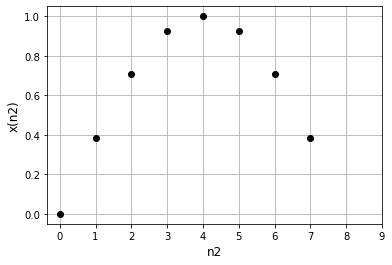

In [21]:
n_2 = np.arange (0,8) #vector de muestras
x2 = np.sin (n_2*np.pi/8)

plt.plot(n_2,x2,'ko')
plt.grid (True)
plt.xticks(np.arange(0,10,1))
plt.xlabel('n2',fontsize=12)
plt.ylabel('x(n2)',fontsize=12)
plt.show()

In [23]:
# Para representar la señal x(n) en términos de c(k) uso la Ecuación de síntesis. 

N2 = 8

k2 = np.arange(0,8,dtype=complex)

c2 = np.piecewise(k2,[k2==0],

        [lambda k2: 1/8*(1+2/((2)**(1/2))+2*np.cos(np.pi/8)+2*np.sin(np.pi/8)), lambda k2: np.exp(-1j*k2*np.pi)/8*(1+2/((2)**(1/2))*np.cos(k2*np.pi/2)+2*np.cos(np.pi/8)*np.cos(k2*np.pi/4)+2*np.sin(np.pi/8)*np.cos(3*k2*np.pi/4))])



n2 = np.arange(3*N2)

xrec2 = np.zeros(len(n2),dtype=complex)

s2 = 0

for i in np.arange(0,N2):

    s2 = s2 + c2[i] * np.exp(1j*2*np.pi*i*n2/N2)

xrec2 = s2

/Users/paulaaguirrecarol/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<function matplotlib.pyplot.show(close=None, block=None)>

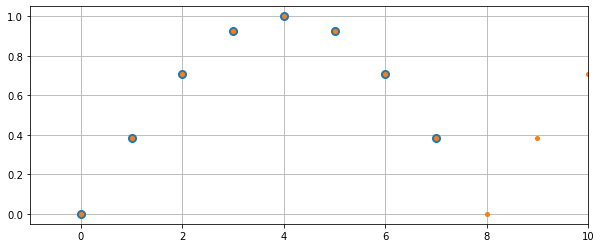

In [24]:
plt.figure (figsize=(10,4))
plt.plot (n_2,x2,"o",ms=8)
plt.plot (n2,xrec2,"o",ms=4)
plt.xlim (-1,10)
plt.grid (True)
plt.show

- - -

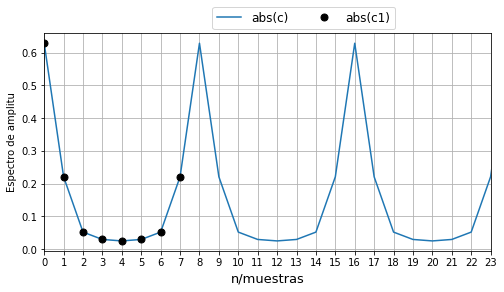

In [25]:
N2 = 8 

c2 = Espectro(x2)
pa2 = np.arange (N2)
N2, Fs = 800, 100
k2 = np.arange(N2)
ca = np.ndarray(N2,dtype=complex) # defino la longitud del vector c
s2 = k2
for q in k2:
    if q==0:
        ca[q]=1/8*(1+2/((2)**(1/2))+2*np.cos(np.pi/8)+2*np.sin(np.pi/8))
    else:
        ca[q]=np.exp(-1j*q*np.pi)/8*(1+2/((2)**(1/2))*np.cos(q*np.pi/2)+2*np.cos(np.pi/8)*np.cos(q*np.pi/4)+2*np.sin(np.pi/8)*np.cos(3*q*np.pi/4))
        # reemplazo k por s en la ecuación


plt.figure(figsize=(8,4))
plt.plot(s2, abs(ca))
plt.plot(pa2,abs(c2),'ko',ms=7)
plt.xlabel('n/muestras', fontsize=13)
plt.xlim(0,8)
plt.ylabel('Espectro de amplitu')
plt.legend(('abs(c)','abs(c1)'),prop={'size':12},bbox_to_anchor=(0.8,1.15),ncol=2)
plt.xticks (n2)
plt.grid(True)
plt.show()

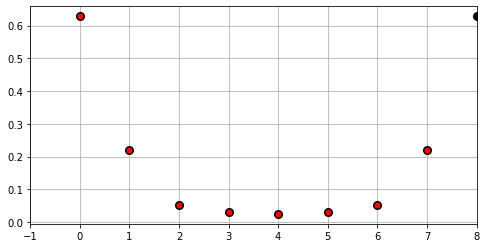

In [26]:
N2 , Fs2 = 8 , 1
X2 = fft (x2)/N2
frq2 = fftfreq (N2, 1/Fs2)
p2 = np.arange (len(X2))

plt.figure(figsize=(8,4))
plt.plot (figsize = (10,4))
plt.plot (k2,abs (ca),"ko",ms=8)
plt.plot (p2,abs (X2),"ro",ms=5)
plt.xlim (-1,8)
plt.grid (True)
plt.show()

- - -

    3. Ídem al ejercicio anterior pero usando la señal, cuyo ciclo se muestra en la figura 3. 
    
    𝑥3(𝑛) = { 0     𝑠𝑖 0 ≤ 𝑛 < 4 𝑦 8 ≤ 𝑛 < 12
            { 𝑠𝑖𝑛 (𝜋𝑛/8) 𝑠𝑖 4 ≤ 𝑛 < 8 𝑦 12 ≤ 𝑛 < 16


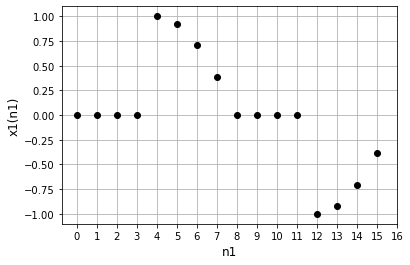

In [27]:
n3 = np.arange (0,16,dtype=float) #vector de muestras
x3 = np.piecewise (n3, [ (n3 >= 0) & (n3 < 4) , (n3 >= 8) & (n3 < 12) ] , [lambda n3: 0, lambda n3: 0 , lambda n3: np.sin (n3*np.pi/8)])

plt.plot(n3,x3,'ko')
plt.grid (True)
plt.xticks(np.arange(0,17,1))
plt.xlabel('n1',fontsize=12)
plt.ylabel('x1(n1)',fontsize=12)
plt.show()

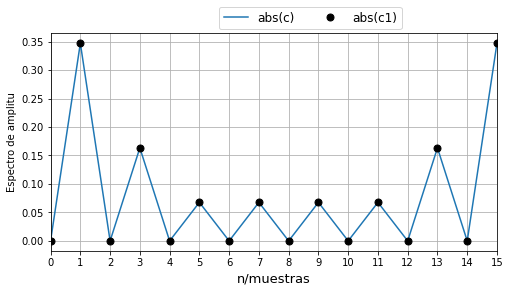

In [28]:
N3 = 16 

c3 = Espectro(x3)
pa3 = np.arange (N3)
N3, Fs = 800, 100
k3 = np.arange(N3)
ca3 = np.ndarray(N3,dtype=complex) # defino la longitud del vector c
s3 = k3
for q in k2:
    if q==0:
        ca3[q] = 0 
    else:
        ca3[q] = 1/16 * ( (np.sin(4*np.pi/8)*np.exp (-2j*np.pi*q*4/16)) + (np.sin(5*np.pi/8)*np.exp (-2j*np.pi*q*5/16)) + (np.sin(6*np.pi/8)*np.exp (-2j*np.pi*q*6/16)) + (np.sin(7*np.pi/8)*np.exp (-2j*np.pi*q*7/16)) + (np.sin(12*np.pi/8)*np.exp (-2j*np.pi*q*12/16)) + (np.sin(13*np.pi/8)*np.exp (-2j*np.pi*q*13/16)) + (np.sin(14*np.pi/8)*np.exp (-2j*np.pi*q*14/16)) + (np.sin(15*np.pi/8)*np.exp (-2j*np.pi*q*15/16)) ) 
        # reemplazo k por s en la ecuación


plt.figure(figsize=(8,4))
plt.plot(s3, abs(ca3))
plt.plot(pa3,abs(c3),'ko',ms=7)
plt.xlabel('n/muestras', fontsize=13)
plt.xlim(0,8)
plt.ylabel('Espectro de amplitu')
plt.legend(('abs(c)','abs(c1)'),prop={'size':12},bbox_to_anchor=(0.8,1.15),ncol=2)
plt.xticks (n3)
plt.grid(True)
plt.show()

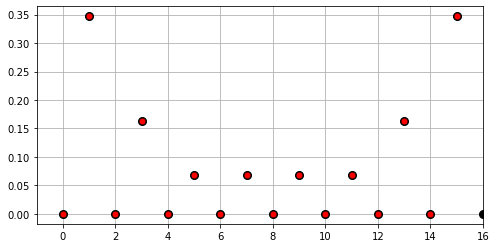

In [29]:
N3 , Fs3 = 16 , 1
X3 = fft (x3)/N3
frq3 = fftfreq (N3, 1/Fs3)
p3 = np.arange (len(X3))

plt.figure(figsize=(8,4))
plt.plot (figsize = (10,4))
plt.plot (k3,abs (ca3),"ko",ms=8)
plt.plot (p3,abs (X3),"ro",ms=5)
plt.xlim (-1,16)
plt.grid (True)
plt.show()

- - -

    Ídem al ejercicio anterior pero usando la señal 𝑥4 (𝑛) de la figura 4. Sugerencia: 

    1/𝑁 ∑ (𝑛) = (𝑁−1)/2 y   ∑ (−𝑛 𝑎**𝑛) = −𝑎 **(1+𝑏)−𝑎**(1+𝑐)+(𝑎**𝑏)𝑏−𝑎**1+𝑏)𝑏−𝑎**(1+𝑐)𝑐+𝑎**(2+𝑐)𝑐 / (𝑎−1)**2

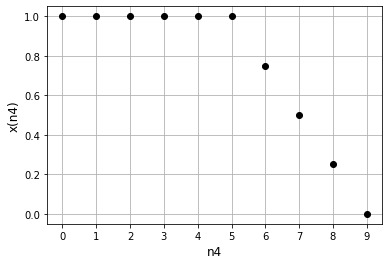

In [30]:
N4=10
n4=np.arange(N4,dtype=float)
x4=np.piecewise(n4,[(n4<=5)&(n4<10)],[lambda n4:1,lambda n4:(1-0.25*(n4-5))])

plt.plot(n4,x4,'ko')
plt.grid (True)
plt.xticks(np.arange(0,10,1))
plt.xlabel('n4',fontsize=12)
plt.ylabel('x(n4)',fontsize=12)
plt.show()

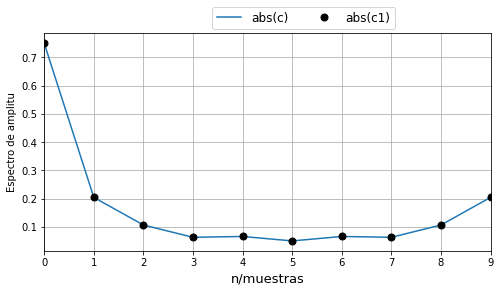

In [31]:
N4 = 10

c4 = Espectro(x4)
pa4 = np.arange (N4)
N4, Fs = 800, 100
k4 = np.arange(N4)
ca4 = np.ndarray(N4,dtype=complex) # defino la longitud del vector c
s4 = k4
for q in k4:
    if q==0:
        ca4[q] = 3/4
    else:
        ca4[q] = 1/10 * (1 + np.exp (-2j*np.pi*q/10) + np.exp (-2j*np.pi*2*q/10) + np.exp (-2j*np.pi*3*q/10) + np.exp (-2j*np.pi*4*q/10) + np.exp (-2j*np.pi*5*q/10) + 0.75*np.exp (-2j*np.pi*6*q/10) + 0.50*np.exp (-2j*np.pi*7*q/10) + 0.25*np.exp (-2j*np.pi*8*q/10) )
        # reemplazo k por s en la ecuación


plt.figure(figsize=(8,4))
plt.plot(s4, abs(ca4))
plt.plot(pa4,abs(c4),'ko',ms=7)
plt.xlabel('n/muestras', fontsize=13)
plt.xlim(0,8)
plt.ylabel('Espectro de amplitu')
plt.legend(('abs(c)','abs(c1)'),prop={'size':12},bbox_to_anchor=(0.8,1.15),ncol=2)
plt.xticks(n4)
plt.grid(True)
plt.show()

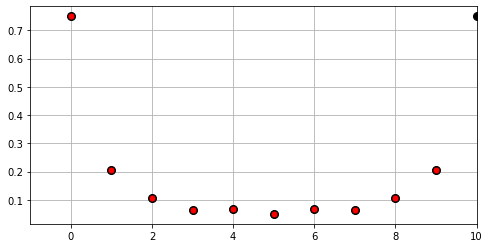

In [32]:
N4 , Fs4 = 10 , 1
X4 = fft (x4)/N4
frq4 = fftfreq (N4, 1/Fs4)
p4 = np.arange (len(X4))

plt.figure(figsize=(8,4))
plt.plot (figsize = (10,4))
plt.plot (k4,abs (ca4),"ko",ms=8)
plt.plot (p4,abs (X4),"ro",ms=5)
plt.xlim (-1,10)
plt.grid (True)
plt.show()

- - -

    Determina los coeficientes de la serie de Fourier y el espectro de densidad de potencia de la señal: 
                                                x(n) = cos (𝜋𝑛/3)

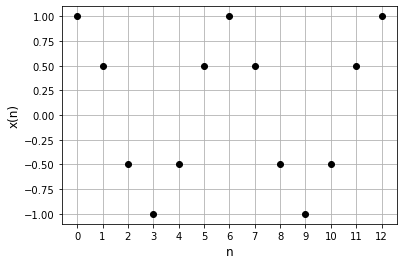

In [36]:
n = np.arange (0,13) #vector de muestras
x = np.cos (n*np.pi/3)

plt.plot(n,x,'ko')
plt.grid (True)
plt.xticks(np.arange(0,13,1))
#plt.yticks (np.arange(-1,1,0.1))
plt.xlabel('n',fontsize=12)
plt.ylabel('x(n)',fontsize=12)
plt.show()

In [68]:
Nad = 13
kad = np.arange(0,13,dtype=complex)
cad = np.piecewise (kad,[(kad==0)],
        [lambda kad: (1/13) *  (( np.cos(0*np.pi/3)) + np.cos(np.pi/3) + (np.cos(2*np.pi/3))  + (np.cos(3*np.pi/3) ) + (np.cos(4*np.pi/3))  + (np.cos(5*np.pi/3) ) +  (np.cos(6*np.pi/3))   +   (np.cos(7*np.pi/3))  +  np.cos(8*np.pi/3) + (np.cos(9*np.pi/3))  + (np.cos(10*np.pi/3))  + (np.cos(11*np.pi/3)) + (np.cos(12 *np.pi/3))  ), 
        lambda kad: (1/13) * ( (np.cos(0*np.pi/3)*np.exp (-2j*np.pi*0*kad/13)) + (np.cos(np.pi/3)*np.exp (-2j*np.pi*kad/13))  +  np.cos(2*np.pi/3)*np.exp (-2j*np.pi*2*kad/13)  +  np.cos(3*np.pi/3)*np.exp (-2j*np.pi*3*kad/13)  +  np.cos(4*np.pi/3)*np.exp (-2j*np.pi*4*kad/13)  +  np.cos(5*np.pi/3)*np.exp (-2j*np.pi*5*kad/13)  +  np.cos(6*np.pi/3)*np.exp (-2j*np.pi*6*kad/13)  + np.cos(7*np.pi/3)*np.exp (-2j*np.pi*7*kad/13)  +  np.cos(8*np.pi/3)*np.exp (-2j*np.pi*8*kad/13)   +  np.cos(9*np.pi/3)*np.exp (-2j*np.pi*9*kad/13)  +  np.cos(10*np.pi/3)*np.exp (-2j*np.pi*10*kad/13)   +   np.cos(11*np.pi/3)*np.exp (-2j*np.pi*11*kad/13)  +  np.cos(12*np.pi/3)*np.exp (-2j*np.pi*12*kad/13)) ] )


nad = np.arange(3*Nad)
xrecad = np.zeros(len(nad),dtype=complex)
sad = 0

for i in np.arange(0,Nad):
    sad = sad + cad[i] * np.exp(1j*2*np.pi*i*nad/Nad)
xrecad = sad

/Users/paulaaguirrecarol/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<function matplotlib.pyplot.show(close=None, block=None)>

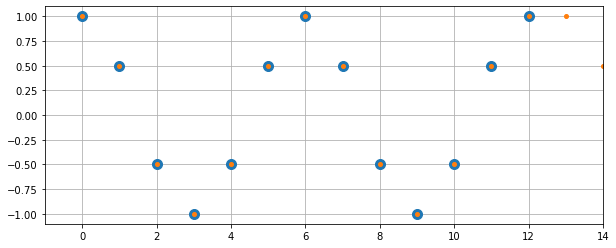

In [69]:
plt.figure (figsize=(10,4))
plt.plot (n,x,"o",ms=10)
plt.plot (nad,xrecad,"o",ms=4)
plt.xlim (-1,14)
plt.grid (True)
plt.show

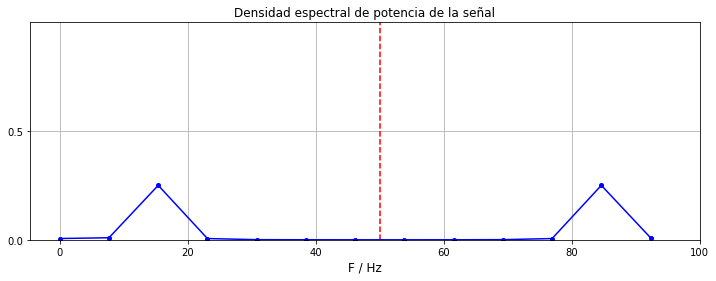

In [77]:
c1 = Espectro(x) #Espectro de la señal muestreada
p1 = np.arange(Nad) #Contador en el dominio de la frecuencia


C1 = c1*np.conjugate(c1) 
#El espectro por su conjugado para sacar la densidad espectral de potencia

Fs = 100

plt.figure(figsize=(12,4))
plt.plot(p1*(Fs/Nad),abs(C1), '.-',color='b',ms=8)


plt.vlines(Fs/2,0,20, linestyles='dashed',color='r')
plt.xlabel('F / Hz', fontsize=12)
plt.yticks (np.arange (0,1,0.5))
plt.ylim (0,1)
plt.xticks (np.arange (0,120,20))
plt.title('Densidad espectral de potencia de la señal')
plt.grid(True)
plt.show()

- - - 